In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom, nbinom, norm, t, uniform

# Ex 1

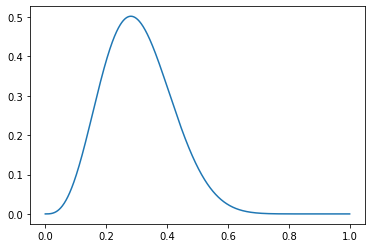

In [2]:
theta = np.linspace(0, 1, 1000)
posterior = beta(a=4, b=4).pdf(theta) * binom(n=10, p=theta).cdf(2)
plt.plot(theta, posterior)
plt.show()

# Ex 2

In [3]:
c1 = 0.4 ** 2
c2 = 0.6 ** 2
p1 = c1 / (c1 + c2)
p2 = c2 / (c1 + c2)
print(1 + p1 * nbinom(n=1, p=0.6).mean() + p2 * nbinom(n=1, p=0.4).mean())

2.2435897435897436


# Ex 3

In [4]:
mean = 1000 / 6
var = 1000 * (1 / 6) * (5 / 6)
norm_approx = norm(loc=mean, scale=np.sqrt(var))
print(norm_approx.ppf(0.05), norm_approx.ppf(0.25), 
      norm_approx.ppf(0.5), norm_approx.ppf(0.75), 
      norm_approx.ppf(0.95))

147.28188077205542 158.71772872992548 166.66666666666666 174.61560460340783 186.0514525612779


# Ex 4

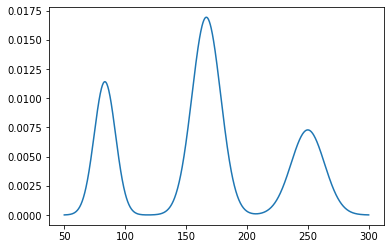

In [5]:
def approximation(prior, theta):
    models = []
    for i, p in enumerate(prior):
        mean = 1000 * theta[i]
        var = 1000 * theta[i] * (1 - theta[i])
        models.append(norm(loc=mean, scale=np.sqrt(var)))
        
    return models

prior = [0.25, 0.5, 0.25]
models = approximation(prior, [1/12, 1/6, 1/4])
prior_predect = lambda y: np.sum([prior[i] * model.pdf(y) for i, model in enumerate(models)], axis=0)
y = np.linspace(50, 300, 1000)
plt.plot(y, prior_predect(y))
plt.show()

# Ex 5

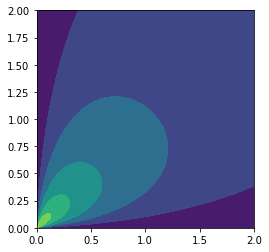

In [6]:
beta_var = lambda a, b: a * b / ((a + b + 1e-100)**2 * (a + b + 1))
a = np.linspace(0, 2, 1000)
b = np.linspace(0, 2, 1000)
aa, bb = np.meshgrid(a, b, sparse=True)
h = plt.contourf(a, b, beta_var(aa, bb))
plt.axis('scaled')
plt.show()

# Ex 10

In [7]:
prior = lambda N: (1 / 100) * ((99 / 100) ** (N - 1))
likelihood = lambda N: (N >= 203) / N
posterior = lambda N: prior(N) * likelihood(N)
N = np.arange(1000000) + 1
prob = posterior(N)
prob = prob / prob.sum()
mean = np.sum(N * prob)
var = np.sum((N**2) * prob) - (mean**2)
print(mean, np.sqrt(var))

279.08851111832587 79.96457540367797


# Ex 11

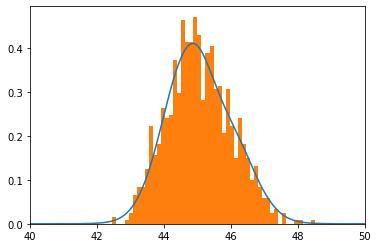

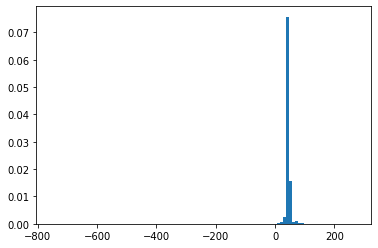

45.09141956749136


In [8]:
prior = lambda theta: (theta >= 0) * (theta <= 100)
model = lambda y, theta: t(df=1, loc=theta).pdf(y)
Y = [43, 44, 45, 46.5, 47.5]
likelihood = lambda theta: np.prod([model(y, theta) for y in Y], axis=0)
posterior = lambda theta: prior(theta) * likelihood(theta)

samples = t(df=1, loc=np.mean(Y)).rvs(100000)
weights = posterior(samples) / t(df=1, loc=np.mean(Y)).pdf(samples)
samples_theta = samples[uniform.rvs(size=100000) <= weights / weights.max()][:1000]

theta = np.linspace(0, 100, 100000)
plt.plot(theta, posterior(theta) / np.mean(posterior(theta)) / 100)
plt.hist(samples_theta, bins=50, density=True)
plt.xlim(40, 50)
plt.show()

samples_y = t(df=1, loc=samples_theta).rvs()
plt.hist(samples_y, bins=100, density=True)
plt.show()

print(samples_y.mean())

# Ex 13